## Load College Scorecard data from Most-Recent-Cohorts-Institution.csv file

* Name: Jonathan King
* Student ID: 815000584
* Date: 04-30-2022

In [2]:
# import libraries
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor

#classifier models
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

#remove warnings
import warnings
warnings.filterwarnings('ignore')

# making data frame from csv file 
college_file = pd.read_csv("Most-Recent-Cohorts-Institution.csv") 

print('Size of orginal file ',college_file.shape)

Size of orginal file  (6694, 2989)


In [3]:
#reduce the columns list of the field to focus in on only certian areas of the scorecard
#column list
col = [
    'PREDDEG','CONTROL','ADM_RATE','ACTCMMID','SAT_AVG',
    'PCIP01','PCIP03','PCIP04','PCIP05','PCIP09','PCIP10','PCIP11','PCIP12','PCIP13','PCIP14','PCIP15','PCIP16',
    'PCIP19','PCIP22','PCIP23','PCIP24','PCIP25','PCIP26','PCIP27','PCIP29','PCIP30','PCIP31','PCIP38','PCIP39',
    'PCIP40','PCIP41','PCIP42','PCIP43','PCIP44','PCIP45','PCIP46','PCIP47','PCIP48','PCIP49','PCIP50','PCIP51',
    'PCIP52','PCIP54','UGDS','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI',
    'UGDS_2MOR','UGDS_NRA','UGDS_UNKN','MD_EARN_WNE_P10','ICLEVEL','COSTT4_A','MEDIAN_HH_INC','FIRST_GEN',
    'PAR_ED_PCT_MS','PAR_ED_PCT_HS','PAR_ED_PCT_PS', 'DEBT_N','LO_INC_DEBT_MDN','MD_INC_DEBT_MDN','HI_INC_DEBT_MDN',
    'MALE_DEBT_MDN', 'DEBT_MDN', 'FEMALE_DEBT_MDN','PCTPELL']

## Cleaning and prepering data

In [4]:
#create new dataframe with selected column
college_info = college_file[col].copy()

#delet the original dataframe to free up memory
del college_file

#replace 'PrivacySuppressed' with nans to easily remove rows that contain this data
college_info = college_info.replace('PrivacySuppressed', None)

In [5]:
#find all columns that are data type object
print(college_info.select_dtypes('object').head())

  MEDIAN_HH_INC     FIRST_GEN PAR_ED_PCT_MS PAR_ED_PCT_HS PAR_ED_PCT_PS  \
0      49720.22  0.3658280922  0.0164220825  0.3494060098  0.6341719078   
1      55735.22   0.341223671  0.0222668004  0.3189568706   0.658776329   
2       53683.7        0.5125          0.05        0.4625        0.4875   
3      58688.62  0.3101321586  0.0198237885    0.29030837  0.6898678414   
4       46065.2  0.3434343434  0.0188246097  0.3246097337  0.6565656566   

  DEBT_N LO_INC_DEBT_MDN MD_INC_DEBT_MDN HI_INC_DEBT_MDN MALE_DEBT_MDN  \
0   3796           16000           15159           14463         14500   
1   7372           16219           15000           14591         15000   
2    541            9500           17220           24650         12500   
3   3102           14126           14639           13500         13043   
4   3218           17827           15875           16500         15000   

  DEBT_MDN FEMALE_DEBT_MDN  
0    15250           16500  
1    15085           15250  
2    10984       

In [6]:
#Convert all columns to numaric
college_info = college_info.apply(pd.to_numeric, errors='coerce')

#Check to see that data is fixed
print(college_info.select_dtypes('object').head())

print(college_info.shape)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
(6694, 69)


In [7]:
#Function to run data through various models and see performance
#Regressor models
def regessor (X_train, y_train, X_test, y_test):
   
    #linear regression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)    
    y_pred_reg = regressor.predict(X_test)    
    mlR2 = regressor.score(X_test, y_test)
    print('Linear Regression R squared: %.4f' % mlR2)    
    lin_mse = mean_squared_error(y_pred_reg, y_test)
    lin_rmse = np.sqrt(lin_mse)
    print('Linear Regression RMSE: %.4f' % lin_rmse,'\n')

    #Lasso
    reg = Lasso(alpha=0.1,max_iter=1e6)
    reg.fit(X_train, y_train)
    lasso_r2 = reg.score(X_test,y_test)
    print('Lasso R squared: %.4f' % lasso_r2)    
    y_pred_laso = reg.predict(X_test)
    mse_test = mean_squared_error(y_test,y_pred_laso)
    lasso_rmse = np.sqrt(mse_test)
    print('Lasso RMSE: %.4f' % lasso_rmse,'\n')

    #Decission Tree
    DTreg = DecisionTreeRegressor(random_state = 0)
    DTreg.fit(X_train, y_train)
    y_DTpred = DTreg.predict(X_test)
    DTr2 = DTreg.score(X_test, y_test)
    print('Decision Tree R squared: %.4f' % DTr2)
    dt_mse_test = mean_squared_error(y_test,y_DTpred)
    dt_rmse = np.sqrt(dt_mse_test)
    print('Decision Tree RMSE: %.4f' % dt_rmse,'\n')

    #Random Forest
    RFreg = RandomForestRegressor(n_estimators = 300, random_state = 0)
    RFreg.fit(X_train, y_train)
    # Predicting the Test set results of Random Forest
    y_FRpred = RFreg.predict(X_test)
    RFr2 = RFreg.score(X_test, y_test)
    print('Random Forest R squared: %.4f' % RFr2)
    # Calculate root-mean-square error (RMSE)
    RF_mse_test = mean_squared_error(y_test,y_FRpred)
    RF_rmse = np.sqrt(RF_mse_test)
    print('Random Forest RMSE: %.4f' % RF_rmse,'\n')

In [8]:
#Function to run data through various models and see performance
#classifier models
def classifer(X_train, y_train, X_test, y_test):

    #KNN clasifier with 4 neighnors
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
 
    print('KNN Accuracy: %.2f' % accuracy_score(y_test, y_pred_knn))
    print('KNN recall: %.2f' % recall_score(y_test, y_pred_knn, average='weighted'))
    print('KNN percision: %.2f' %precision_score(y_test, y_pred_knn, average='weighted',),'\n')
    
    #SLM
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    print('SVM Accuracy: %.2f' % accuracy_score(y_test, y_pred_svm))
    print('SVM recall: %.2f' % recall_score(y_test, y_pred_svm, average='weighted'))
    print('SVM percision: %.2f' % precision_score(y_test, y_pred_svm, average='weighted'),'\n')

    
    #Decision Tree
    dt = DecisionTreeClassifier(random_state=0)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    #calcaulte the accuracy, recall and percision
    print('Decision Tree Accuracy: %.2f' % accuracy_score(y_test, y_pred_dt))
    print('Decision Tree Recall: %.2f' % recall_score(y_test, y_pred_dt, average='weighted'))
    print('Decision Tree Precision: %.2f' % precision_score(y_test, y_pred_dt, average='weighted'),'\n')
    
    #import gaussian naive bayes
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred_gnb = gnb.predict(X_test)
    #calcaulte the accuracy, recall and percision
    print('Bayes Accuracy: %.2f' % accuracy_score(y_test, y_pred_gnb))
    print('Bayes recall: %.2f' % recall_score(y_test, y_pred_gnb, average='weighted'))
    print('Bayes percision: %.2f' % precision_score(y_test, y_pred_gnb, average='weighted'),'\n')
    
    #import random forest
    rf = RandomForestClassifier(n_estimators = 300)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    #calcaulte the accuracy, recall and percision
    print('Random Forest Accuracy: %.2f' % accuracy_score(y_test, y_pred_rf))
    print('Random Forest recall: %.2f' % recall_score(y_test, y_pred_rf, average='weighted'))
    print('Random Forest precision: %.2f' % precision_score(y_test, y_pred_rf, average='weighted'),'\n')

    
    #import voting classifier
    #list to hold estimators
    est = [('Random Forest',rf),
               ('K Nearest Neighbours',knn),
               ('Classification Tree',dt),
               ('Naive',gnb),
               ('SVM',svm)]

    # Voting Classifier with hard voting
    vot_hard = VotingClassifier(estimators = est, voting ='hard')
    vot_hard.fit(X_train, y_train)
    y_pred_vot = vot_hard.predict(X_test)
    print('Voting Accuracy: %.2f' % accuracy_score(y_test, y_pred_vot))
    print('Voting Recall: %.2f' % recall_score(y_test, y_pred_vot, average='weighted'))
    print('Voting Percision: %.2f' % precision_score(y_test, y_pred_vot, average='weighted'))
    

## •	Comparing average ACT scores to average SAT scores of students enrolled in college

In [9]:
#pull data subset from main data and remove any rows with Nans
college_sub1 = college_info[['ACTCMMID','SAT_AVG']].dropna()

#Set independent(X) and Dependent(y) data
X = college_sub1[['ACTCMMID']]
y = college_sub1['SAT_AVG']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

#run data through regressor funciton to test in various models to see perfromance
regessor (X_train, y_train, X_test, y_test)

Linear Regression R squared: 0.9693
Linear Regression RMSE: 23.1502 

Lasso R squared: 0.9693
Lasso RMSE: 23.1515 

Decision Tree R squared: 0.9697
Decision Tree RMSE: 23.0198 

Random Forest R squared: 0.9696
Random Forest RMSE: 23.0262 



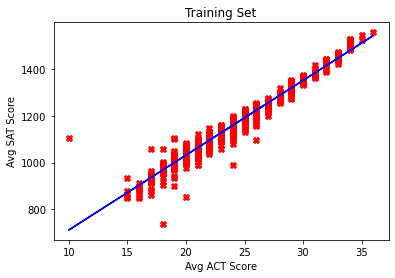

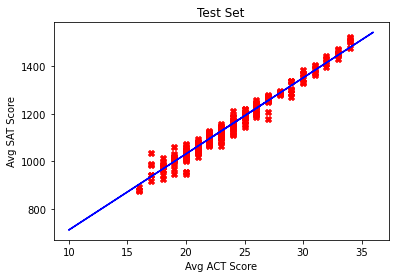

In [10]:
#visualization of model

sat_reg = LinearRegression()
sat_reg.fit(X_train, y_train)

#Graph scatter plot with regression line on training data
plt.scatter(X_train,y_train,color = 'red', marker = 'X')
plt.plot(X_train, sat_reg.predict(X_train),color = 'blue')
plt.title('Training Set')
plt.xlabel('Avg ACT Score')
plt.ylabel ('Avg SAT Score')
plt.show()

#Graph scatter plot with regression line on test data
plt.scatter(X_test,y_test,color = 'red', marker = 'X')
plt.plot(X_train, sat_reg.predict(X_train),color = 'blue')
plt.title('Test Set')
plt.xlabel('Avg ACT Score')
plt.ylabel ('Avg SAT Score')
plt.show()

In [11]:
#Print out formula for model 

#coefficient
b = sat_reg.coef_
a = sat_reg.intercept_

print('Linear formula')
print("Avg SAT = (",b, " * ACT socre )+ ",a)

Linear formula
Avg SAT = ( [31.94412575]  * ACT socre )+  392.75441406742425


## •	How the racial makeup of undergraduates and size of the school  can be used to determine what type of a 4 year college is: Public, Private nonprofit or Private for-profit

In [12]:
#set data set to only 4 year colleges (ICLEVEL == 1)
Coll_4 = college_info.query('ICLEVEL == 1')

#set columns used in classification
col = ['CONTROL','UGDS','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN',
       'UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN',]

#narrow down to specific rows and remove any rows with Nans
Coll_4 = Coll_4[col].dropna()

#Set independent(X) and Dependent(y) data
X = Coll_4.drop(['CONTROL'], axis=1).dropna()
y = Coll_4['CONTROL']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0,stratify=y)

#run data through classifer funciton to test in various models to see perfromance
classifer(X_train, y_train, X_test, y_test)


KNN Accuracy: 0.65
KNN recall: 0.65
KNN percision: 0.60 

SVM Accuracy: 0.69
SVM recall: 0.69
SVM percision: 0.62 

Decision Tree Accuracy: 0.70
Decision Tree Recall: 0.70
Decision Tree Precision: 0.70 

Bayes Accuracy: 0.65
Bayes recall: 0.65
Bayes percision: 0.64 

Random Forest Accuracy: 0.80
Random Forest recall: 0.80
Random Forest precision: 0.79 

Voting Accuracy: 0.72
Voting Recall: 0.72
Voting Percision: 0.71


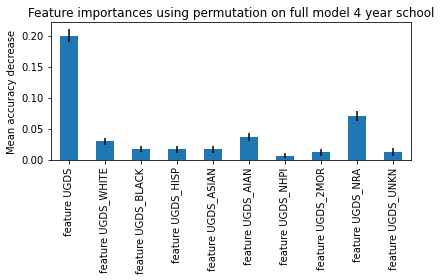

In [13]:
#visualization of model feature importance 4 year school

from sklearn.inspection import permutation_importance

#random forest classifier
Coll_4_rf = RandomForestClassifier(n_estimators=300,random_state=0)
Coll_4_rf.fit(X_train, y_train)

#Computing feature importance
result = permutation_importance(Coll_4_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
feature_names = [f"feature {i}" for i in col[1:]]
forest_importances = pd.Series(result.importances_mean, index=feature_names)

#plot graph

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model 4 year school")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

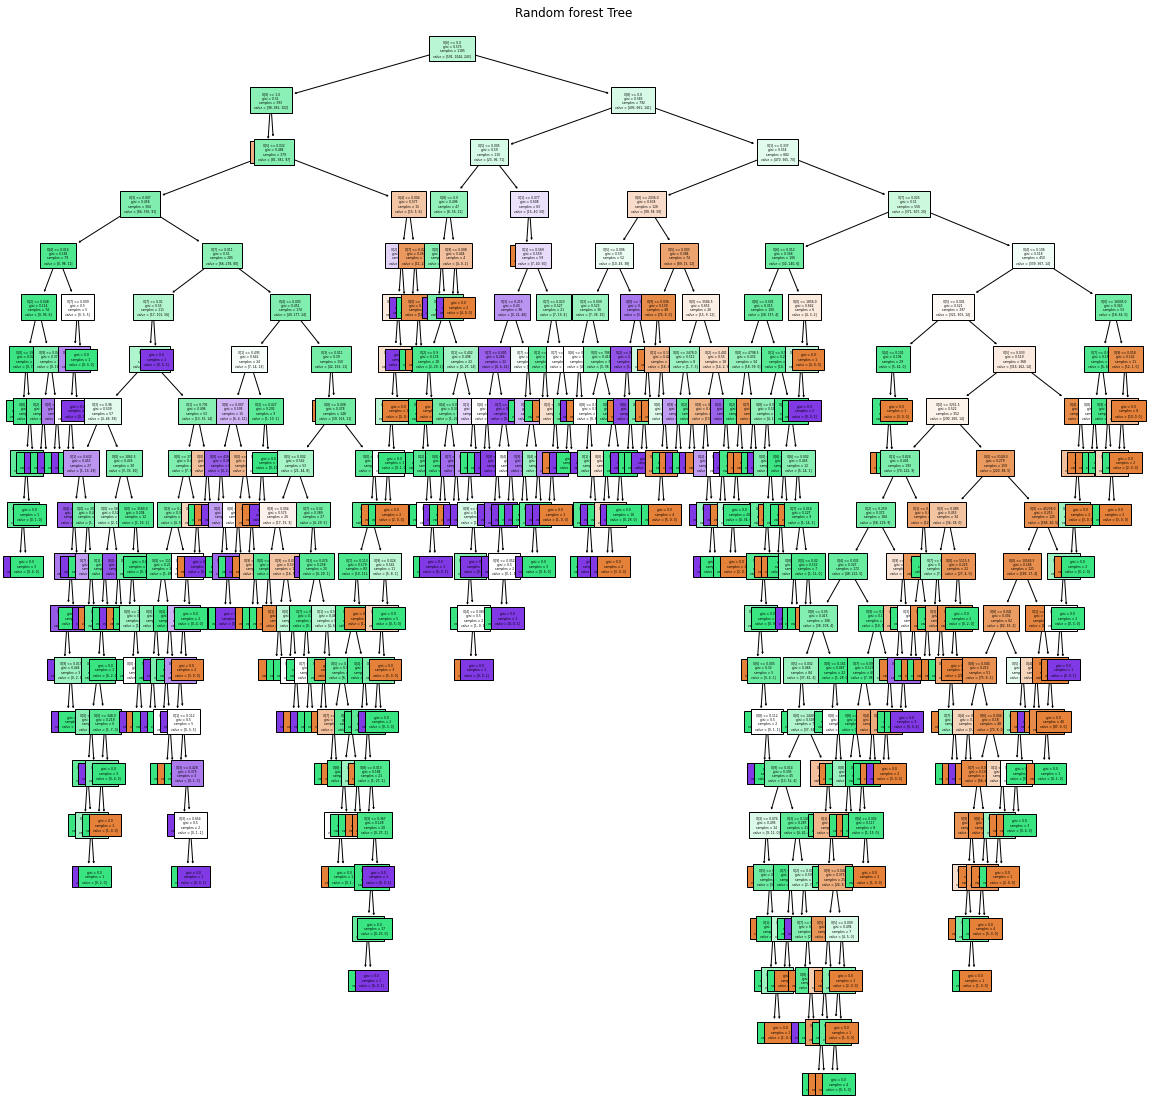

In [14]:
#visualization of random forest model

from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(Coll_4_rf.estimators_[0],filled = True, fontsize=3);
plt.title('Random forest Tree')
plt.show()

## •	How the racial makeup of undergraduates and size of the school  can be used to determine what type of a 2 year college is: Public, Private nonprofit or Private for-profit

In [15]:
#set data set to only 2 year colleges (ICLEVEL == 2)
Coll_2 = college_info.query('ICLEVEL == 2')

#narrow down to specific rows and remove any rows with Nans
Coll_2 = Coll_2[col].dropna()

#Set independent(X) and Dependent(y) data
X = Coll_2.drop(['CONTROL'], axis=1).dropna()
y = Coll_2['CONTROL']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0,stratify=y)

#run data through classifer funciton to test in various models to see perfromance
classifer(X_train, y_train, X_test, y_test)

KNN Accuracy: 0.71
KNN recall: 0.71
KNN percision: 0.71 

SVM Accuracy: 0.76
SVM recall: 0.76
SVM percision: 0.74 

Decision Tree Accuracy: 0.77
Decision Tree Recall: 0.77
Decision Tree Precision: 0.78 

Bayes Accuracy: 0.74
Bayes recall: 0.74
Bayes percision: 0.75 

Random Forest Accuracy: 0.84
Random Forest recall: 0.84
Random Forest precision: 0.83 

Voting Accuracy: 0.80
Voting Recall: 0.80
Voting Percision: 0.80


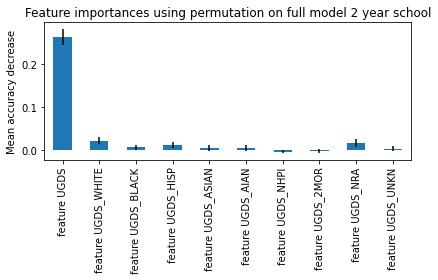

In [16]:
#visualization of model feature importance_2 year

#random forest classifier
Coll_2_rf = RandomForestClassifier(n_estimators=300,random_state=0)
Coll_2_rf.fit(X_train, y_train)

#Computing feature importance
result = permutation_importance(Coll_2_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
feature_names = [f"feature {i}" for i in col[1:]]
forest_importances = pd.Series(result.importances_mean, index=feature_names)

#plot graph

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model 2 year school")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## •	What combinations of degrees awarded can predict earnings after college for students for 4 year public schools

In [17]:
#set data set to only 4 year public colleges (ICLEVEL == 1 and CONTROL == 1)
med_earn = college_info.query('ICLEVEL == 1 and CONTROL == 1')

#set columns used in regression
med_colm = ['MD_EARN_WNE_P10','UGDS', 'PCIP01','PCIP03','PCIP04','PCIP05','PCIP09','PCIP10','PCIP11','PCIP12',
            'PCIP13','PCIP14','PCIP15','PCIP16','PCIP19','PCIP22','PCIP23','PCIP24','PCIP25','PCIP26','PCIP27',
            'PCIP29','PCIP30','PCIP31','PCIP38','PCIP39','PCIP40','PCIP41','PCIP42','PCIP43','PCIP44','PCIP45',
            'PCIP46','PCIP47','PCIP48','PCIP49','PCIP50','PCIP51','PCIP52','PCIP54']

#narrow down to specific rows and remove any rows with Nans
med_earn = med_earn[med_colm].dropna()

#Set independent(X) and Dependent(y) data
X = med_earn.drop(['MD_EARN_WNE_P10'], axis=1).dropna()
y = med_earn['MD_EARN_WNE_P10']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

#run data through classifer funciton to test in various models to see perfromance
regessor(X_train, y_train, X_test, y_test)

Linear Regression R squared: 0.4971
Linear Regression RMSE: 9016.8147 

Lasso R squared: 0.4973
Lasso RMSE: 9015.6097 

Decision Tree R squared: 0.3736
Decision Tree RMSE: 10063.3099 

Random Forest R squared: 0.7502
Random Forest RMSE: 6355.6952 



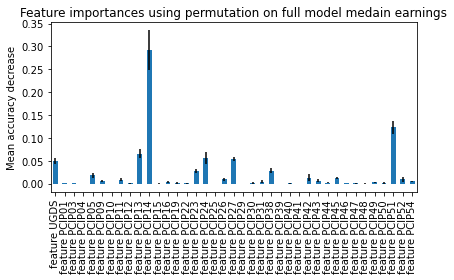

In [18]:
#visualization of model feature importance meadian earnings

#random forest regressor
earn_RF = RandomForestRegressor(n_estimators = 300, random_state = 0)
earn_RF.fit(X_train, y_train)

#Computing feature importance
result = permutation_importance(earn_RF, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
feature_names = [f"feature {i}" for i in med_colm[1:]]
forest_importances = pd.Series(result.importances_mean, index=feature_names)

#plot graph

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model medain earnings")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## •	How the average amount of earnings after finishing college and how the college is controlled (Public, Private nonprofit or Private for-profit) can predict a schools school's predominate degree (associate, bachelor's, etc.) awarded

In [19]:
#set columns used in classifier
deg_colm = ['PREDDEG','MD_EARN_WNE_P10','CONTROL']

#narrow down to specific rows and remove any rows with Nans
deg_type=college_info[deg_colm].dropna()

#Set independent(X) and Dependent(y) data
X = deg_type.drop(['PREDDEG'], axis=1).dropna()
y = deg_type['PREDDEG']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0,stratify=y)

#run data through classifer funciton to test in various models to see perfromance
classifer(X_train, y_train, X_test, y_test)

KNN Accuracy: 0.62
KNN recall: 0.62
KNN percision: 0.62 

SVM Accuracy: 0.61
SVM recall: 0.61
SVM percision: 0.54 

Decision Tree Accuracy: 0.66
Decision Tree Recall: 0.66
Decision Tree Precision: 0.67 

Bayes Accuracy: 0.62
Bayes recall: 0.62
Bayes percision: 0.57 

Random Forest Accuracy: 0.67
Random Forest recall: 0.67
Random Forest precision: 0.67 

Voting Accuracy: 0.66
Voting Recall: 0.66
Voting Percision: 0.65


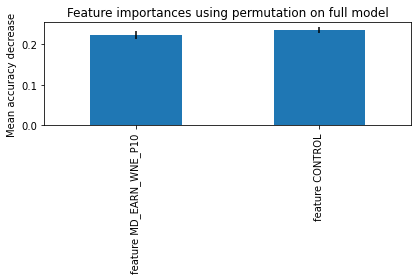

In [20]:
#visualization of model feature importance on predominate degree

#random forest classifier
deg_dt = DecisionTreeClassifier(random_state=0)
deg_dt.fit(X_train, y_train)


#Computing feature importance
result = permutation_importance(deg_dt, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
feature_names = [f"feature {i}" for i in deg_colm[1:]]
tree_importances = pd.Series(result.importances_mean, index=feature_names)

#plot graph

fig, ax = plt.subplots()
tree_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

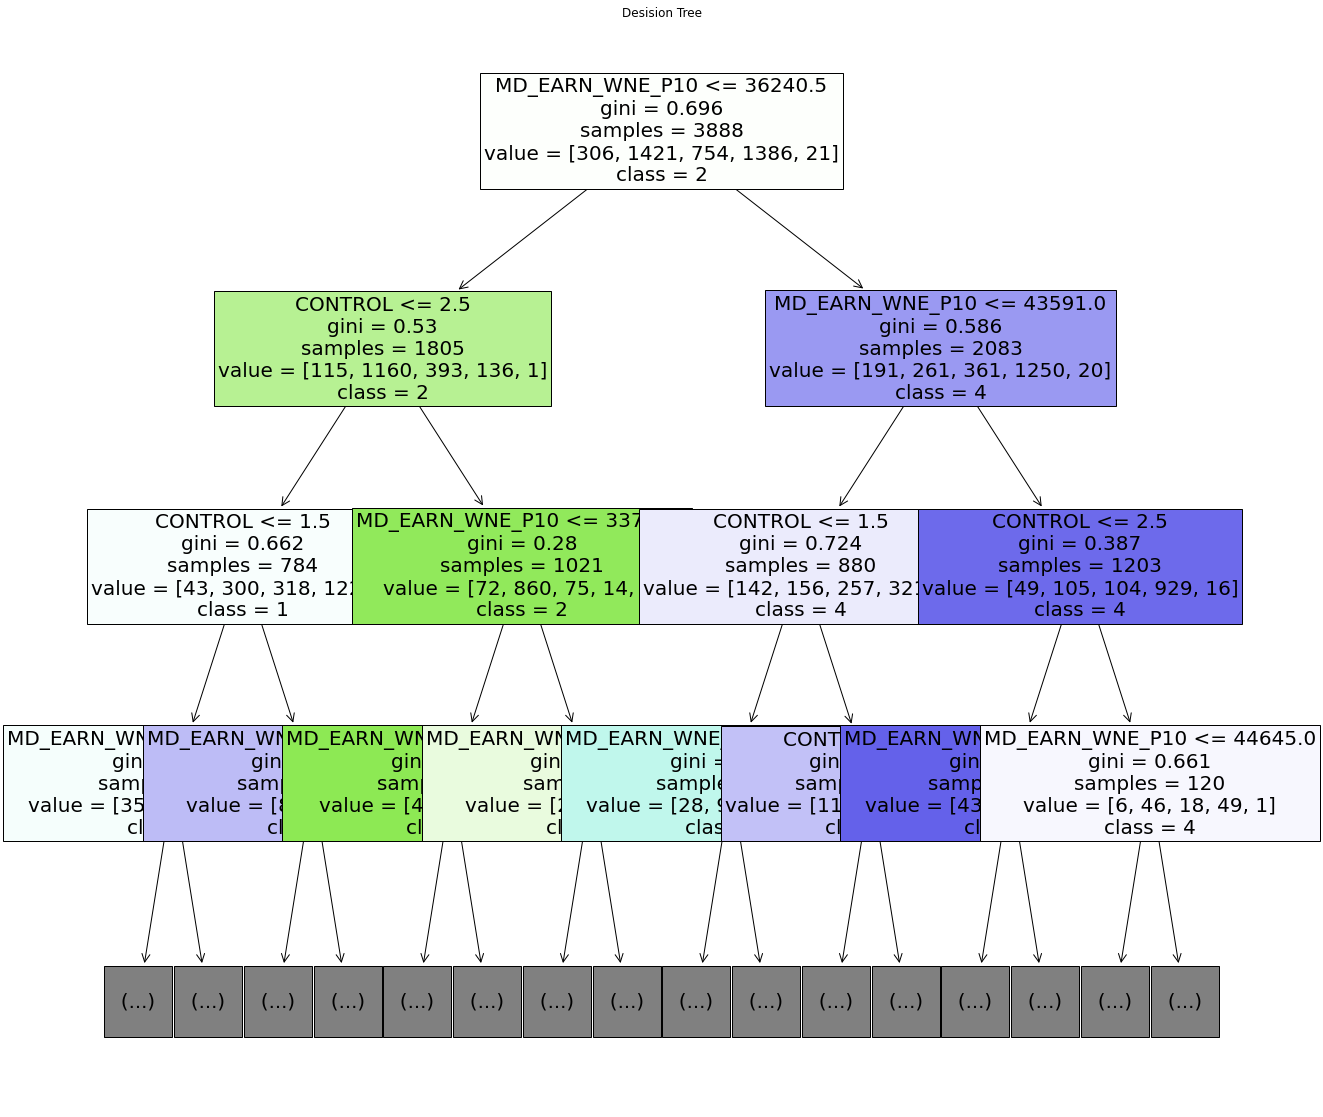

In [21]:
#visualization of decision tree model

#decalse class and feature names
cn = [ str(i) for i in y.unique()]
fn = ['MD_EARN_WNE_P10','CONTROL']

plt.figure(figsize=(20,20))
tree.plot_tree(deg_dt,filled = True,class_names=cn, feature_names=fn,
               max_depth = 3,fontsize=20)
plt.title('Desision Tree')
plt.show()

## •	How the amount of debt a student has after leaving college can predict a school's predominate degree (associate, bachelor's, etc.) type

In [22]:
#set columns used in classifier
debt_colm = ['PREDDEG','DEBT_MDN','LO_INC_DEBT_MDN','MD_INC_DEBT_MDN',
             'HI_INC_DEBT_MDN','FEMALE_DEBT_MDN','MALE_DEBT_MDN']

#narrow down to specific rows and remove any rows with Nans
debt = college_info[debt_colm].dropna()

#Set independent(X) and Dependent(y) data
X = debt.drop([ 'PREDDEG'], axis=1)
y = debt['PREDDEG']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0,stratify=y)

#run data through classifer funciton to test in various models to see perfromance
classifer(X_train, y_train, X_test, y_test)

KNN Accuracy: 0.67
KNN recall: 0.67
KNN percision: 0.66 

SVM Accuracy: 0.64
SVM recall: 0.64
SVM percision: 0.69 

Decision Tree Accuracy: 0.63
Decision Tree Recall: 0.63
Decision Tree Precision: 0.63 

Bayes Accuracy: 0.58
Bayes recall: 0.58
Bayes percision: 0.47 

Random Forest Accuracy: 0.69
Random Forest recall: 0.69
Random Forest precision: 0.67 

Voting Accuracy: 0.70
Voting Recall: 0.70
Voting Percision: 0.69


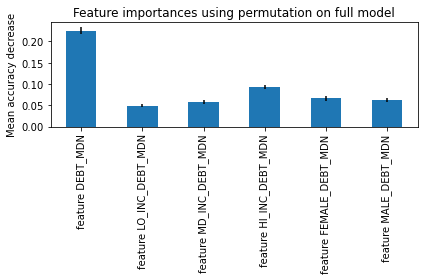

In [23]:
#visualization of model feature importance on predominate degree

knn = KNeighborsClassifier(n_neighbors=4)
rf = RandomForestClassifier(n_estimators = 300)
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=0)
svm = SVC()

#list to hold estimators
est = [('Random Forest',rf),
       ('K Nearest Neighbours',knn),
       ('Classification Tree',dt),
       ('Naive',gnb),('SVM',svm)]




# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = est, voting ='hard')
vot_hard.fit(X_train, y_train)

knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
gnb.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)


#Computing feature importance
result = permutation_importance(vot_hard, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
feature_names = [f"feature {i}" for i in debt_colm[1:]]
tree_importances = pd.Series(result.importances_mean, index=feature_names)

#plot graph

fig, ax = plt.subplots()
tree_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## •	How a school’s racial makeup of the school and size, the cost to attend, admission rates, and the parents education and household income can predict what percentage of students received a Pell grant

In [24]:
#set data set to only 4 year colleges (ICLEVEL == 1)
pell = college_info.query('ICLEVEL == 1')

#set columns used in regression
pell_colm = ['PCTPELL','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN',
             'UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN','ADM_RATE','PAR_ED_PCT_MS',
             'PAR_ED_PCT_HS','PAR_ED_PCT_PS','MEDIAN_HH_INC','CONTROL','UGDS','FIRST_GEN','COSTT4_A']

#narrow down to specific rows and remove any rows with Nans
pell=pell[pell_colm].dropna()

#Set independent(X) and Dependent(y) data
X = pell.drop(['PCTPELL'], axis=1).dropna()
y = pell['PCTPELL']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

#run data through classifer funciton to test in various models to see perfromance
regessor(X_train, y_train, X_test, y_test)

Linear Regression R squared: 0.7202
Linear Regression RMSE: 0.0879 

Lasso R squared: 0.4591
Lasso RMSE: 0.1223 

Decision Tree R squared: 0.5322
Decision Tree RMSE: 0.1137 

Random Forest R squared: 0.7298
Random Forest RMSE: 0.0864 



[ 1.26998176e+01  1.30879417e+01  1.29933027e+01  1.28322995e+01
  1.28557502e+01  1.23719710e+01  1.28952943e+01  1.24970405e+01
  1.28534929e+01  2.33312902e-02  1.41525769e-01  9.10634679e-02
 -9.45625137e-02 -2.66501603e-06  8.14307849e-02 -1.17124710e-06
  9.45625137e-02 -3.15306480e-06]


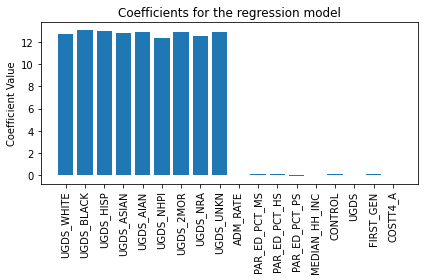

In [25]:
#visualization of model feature importance on pell grant percentage

#Linear Regression
pell_reg = LinearRegression()
pell_reg.fit(X_train, y_train)
result = pell_reg.coef_
print(result)
#plot graph
fig, ax = plt.subplots()
plt.bar(pell_colm[1:], result)
ax.set_title("Coefficients for the regression model")
ax.set_ylabel("Coefficient Value")
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

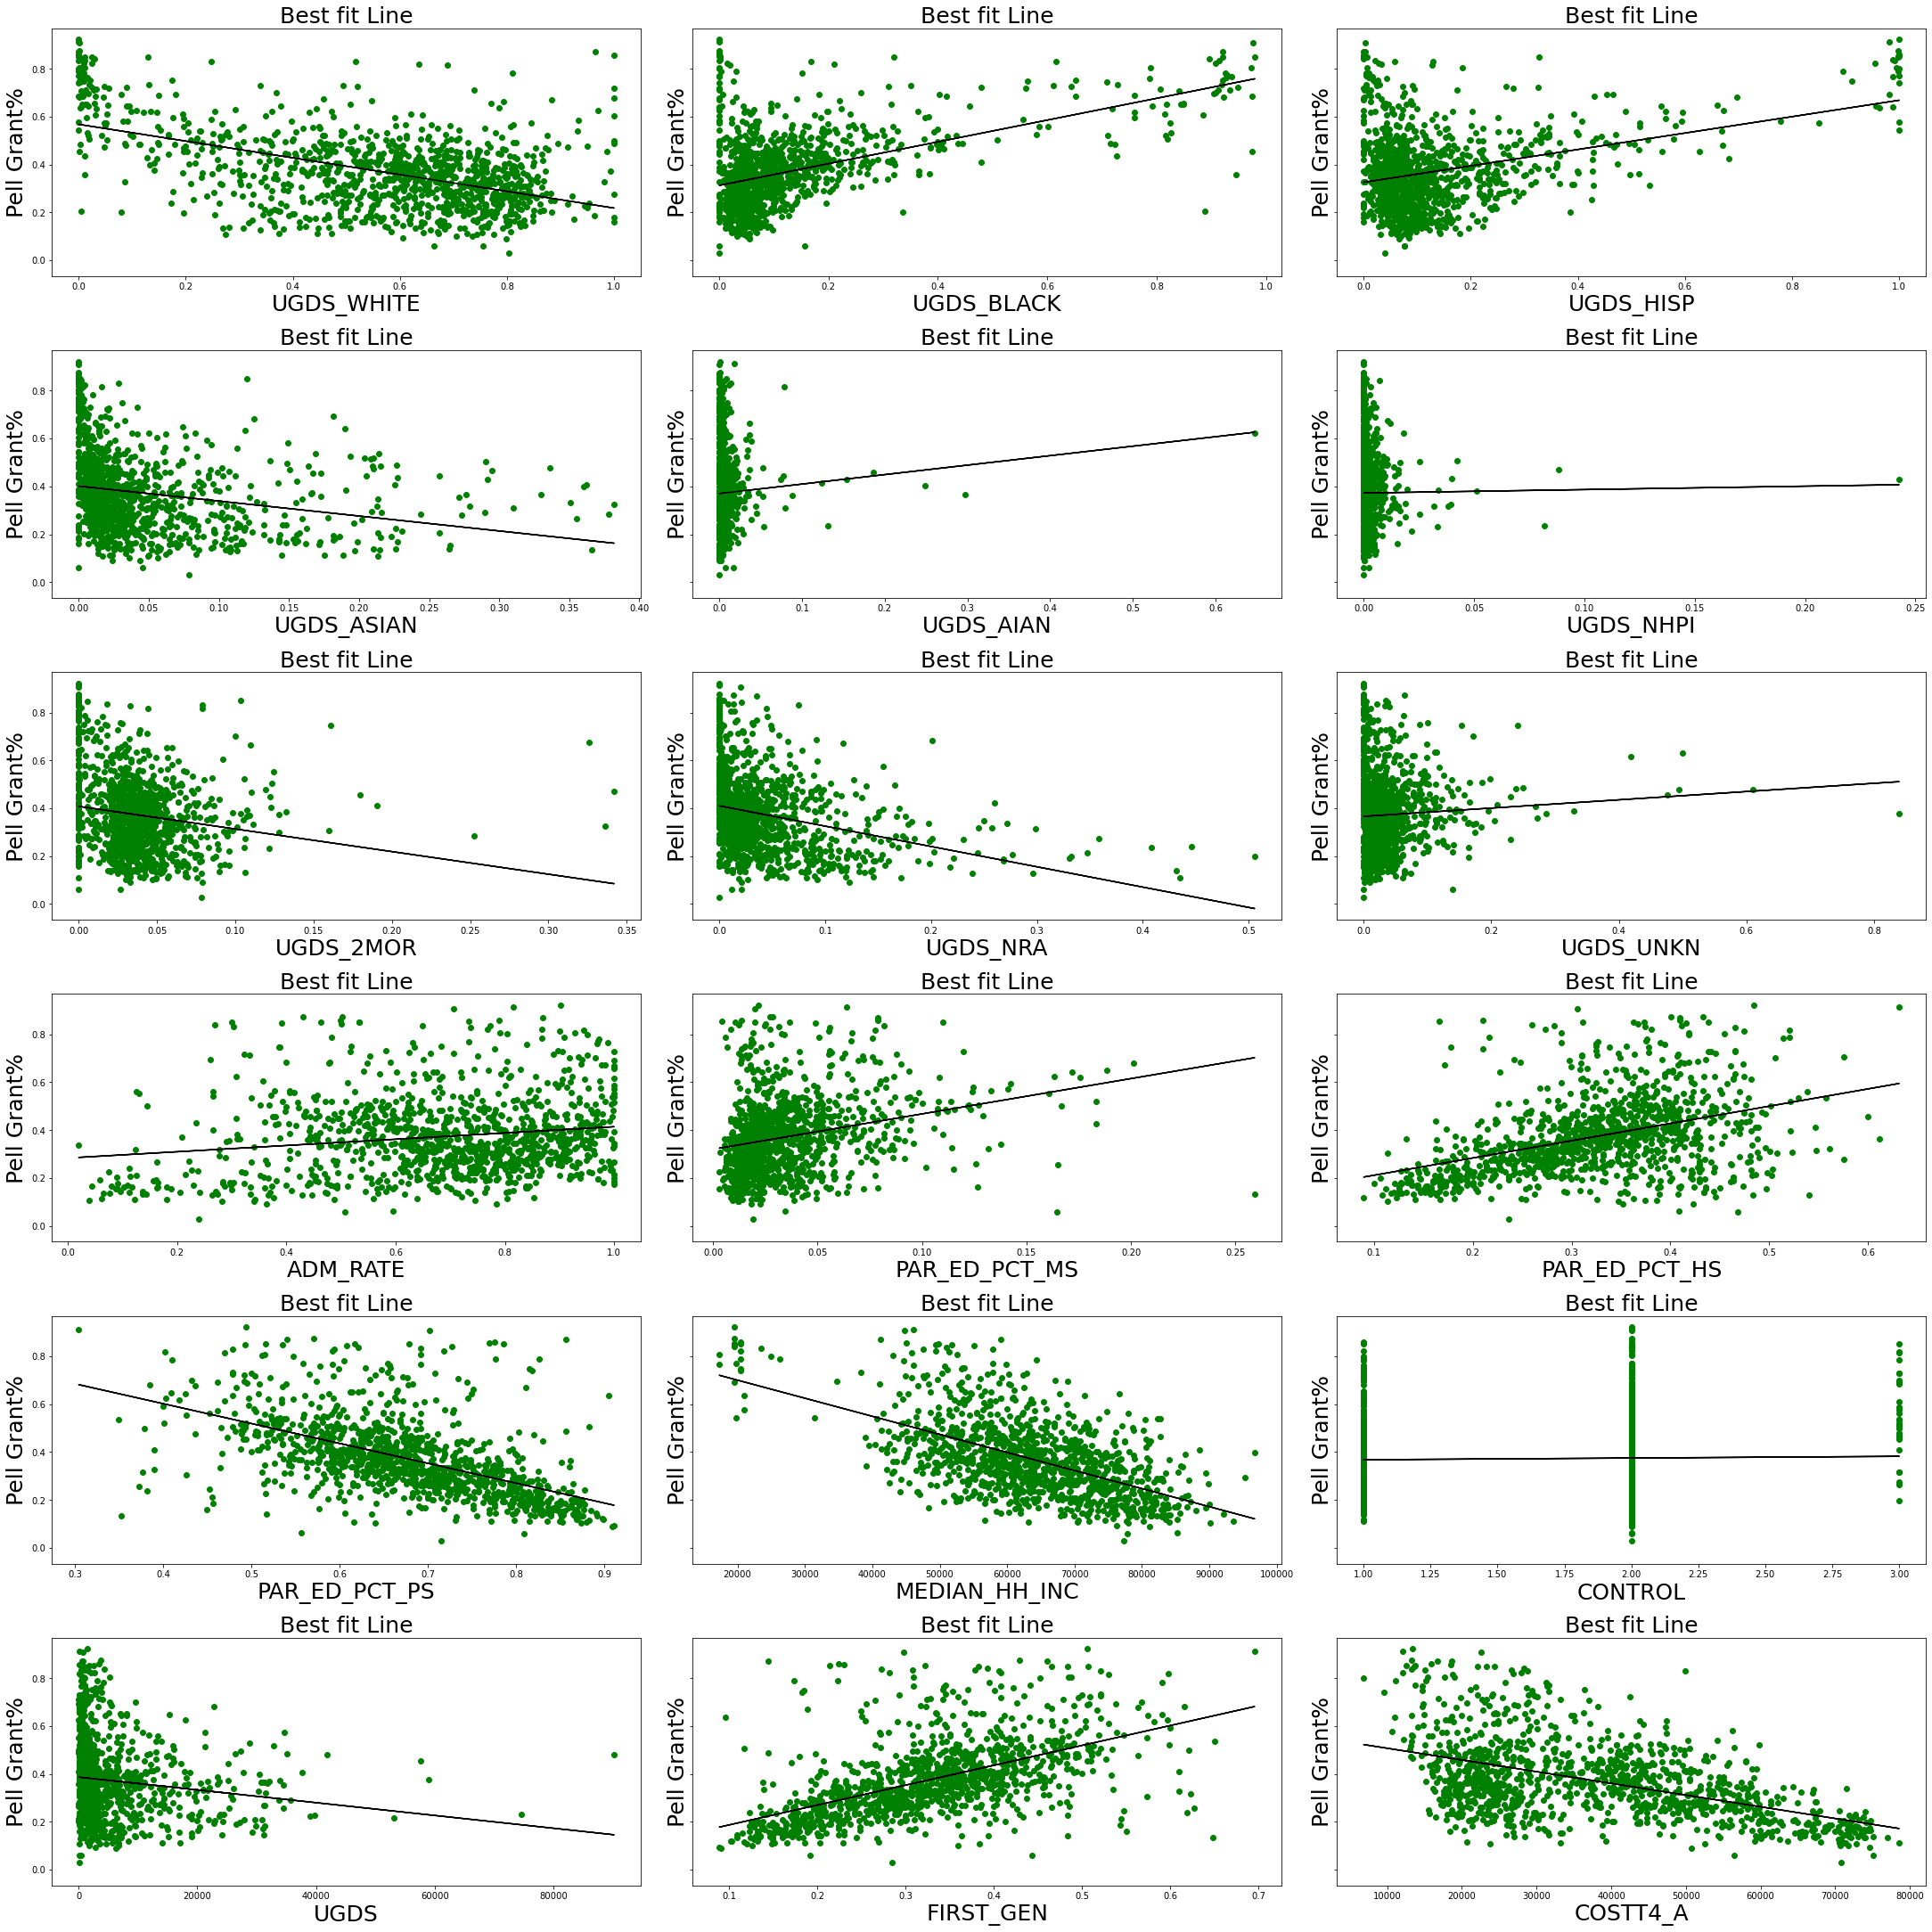

In [26]:
#plot linear regressions
fig, axes = plt.subplots(6,3,sharey=True,constrained_layout=True,figsize=(30,30))

#X column names
depen_var =(X_train.columns)
#start counter for labeling the x axis of graph
c = 0

#create the linear regression graphs for each dependent variable
for i in range(6):
    for j in range (3):
        pell_reg.fit(X_train[depen_var[c]].values[:,np.newaxis], y_train.values)
        axes[i,j].set_title("Best fit Line",fontsize=25)
        axes[i,j].set_xlabel(str(depen_var[c]),fontsize=25)
        axes[i,j].set_ylabel('Pell Grant%',fontsize=25)  
        axes[i,j].scatter(X_train[depen_var[c]].values[:,np.newaxis], y_train,color='g')
        axes[i,j].plot(X_train[depen_var[c]].values[:,np.newaxis],
        pell_reg.predict(X_train[depen_var[c]].values[:,np.newaxis]),color='k')  
        c = c+1              